<a href="https://colab.research.google.com/github/arvindji18/Z-Image-jupyter/blob/main/Z_Image_Turbo_4bit_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/huggingface/diffusers git+https://github.com/Disty0/sdnq

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-77rdxeth
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-77rdxeth
  Resolved https://github.com/huggingface/diffusers to commit 152f7ca357c066c4af3d1a58cdf17662ef5a2f87
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/Disty0/sdnq to /tmp/pip-req-build-xupye77s
  Running command git clone --filter=blob:none --quiet https://github.com/Disty0/sdnq /tmp/pip-req-build-xupye77s
  Resolved https://github.com/Disty0/sdnq to commit 0a01eb324ee776401b636e9f4515045e5add7895
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4522015 sha256=fa88609f42c23de9c7d9d2680869b195def7b0a4492

In [2]:
import torch
import diffusers
from sdnq import SDNQConfig # import sdnq to register it into diffusers and transformers
from sdnq.loader import apply_sdnq_options_to_model

pipe = diffusers.ZImagePipeline.from_pretrained("Disty0/Z-Image-Turbo-SDNQ-uint4-svd-r32", torch_dtype=torch.float32, device_map="cuda")
pipe.transformer = apply_sdnq_options_to_model(pipe.transformer, use_quantized_matmul=True)
pipe.text_encoder = apply_sdnq_options_to_model(pipe.text_encoder, use_quantized_matmul=True)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/487 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/3.48G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [14]:
import torch
import numpy as np
import random

def set_seed(seed: int = 42) -> None:
    """Sets random seeds for reproducibility across PyTorch, NumPy, and Python's random module."""
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # For current CUDA device
    torch.backends.cudnn.deterministic = True  # For cuDNN operations
    torch.backends.cudnn.benchmark = False    # For cuDNN operations

# Call the function to set the seed
set_seed(42)

# Example usage with the generator object
generator = torch.Generator().manual_seed(42)
x = torch.rand(3, 2, generator=generator)
print(x)

# Example usage with global seed
y = torch.rand(3, 2)
print(y)

tensor([[0.8823, 0.9150],
        [0.3829, 0.9593],
        [0.3904, 0.6009]])
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593],
        [0.3904, 0.6009]])


In [9]:
# import torch
# import random
# import numpy as np

# # Define the seed value
# seed = 42

# # Set seed for PyTorch
# torch.manual_seed(seed)

# # Set seed for CUDA (if using GPUs)
# torch.cuda.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)  # For multi-GPU setups

# # Set seed for Python's random module
# random.seed(seed)

# # Set seed for NumPy
# np.random.seed(seed)

# # Ensure deterministic behavior for PyTorch operations
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [10]:
# prompt = """


# """
# image = pipe(
#     prompt=prompt,
#     height=1024,
#     width=1024,
#     num_inference_steps=9,
#     guidance_scale=0.0,
#     # generator=torch.manual_seed(42),
#     generator = torch.Generator().manual_seed(42)
# ).images[0]
# display(image)

  0%|          | 0/9 [00:00<?, ?it/s]

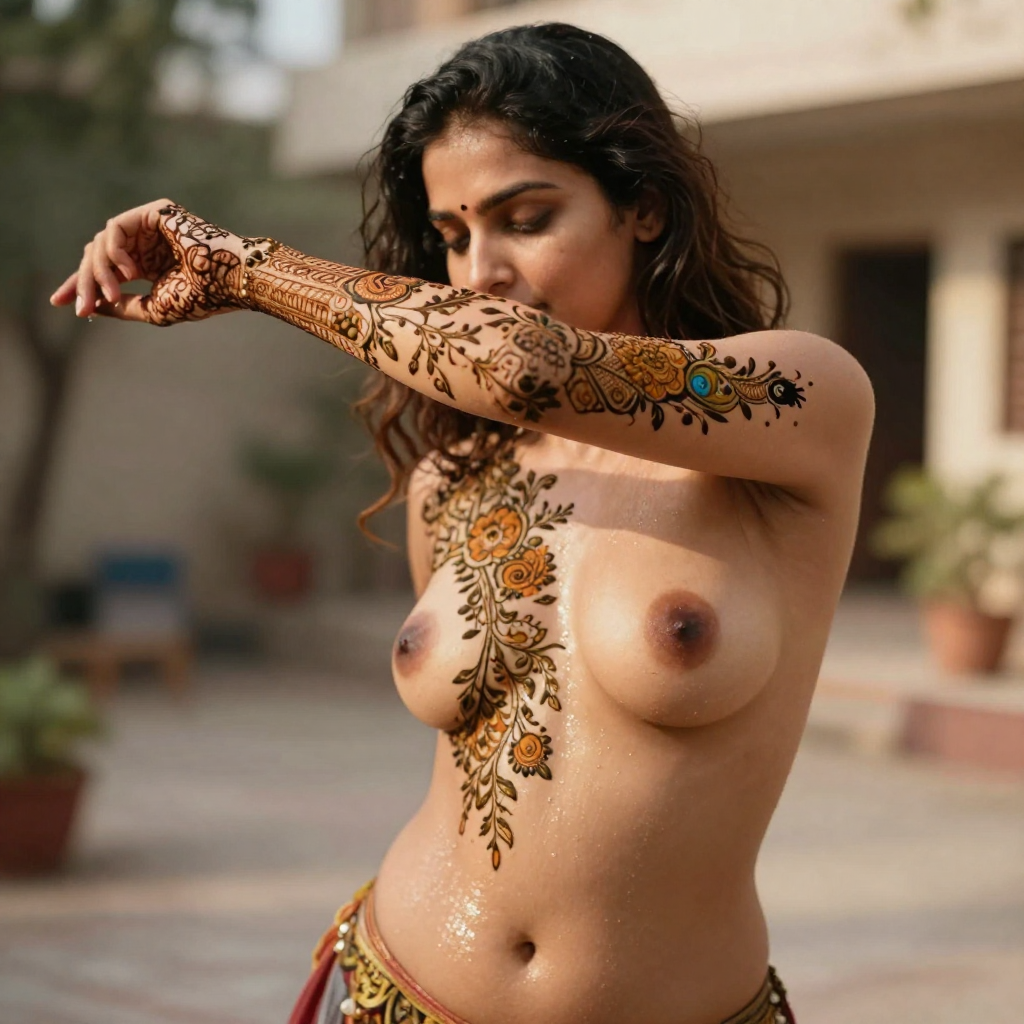

In [17]:
prompt = """

4K vertical video frame (9:16) of a hot Indian woman dancing in a sunlit courtyard — her entire body only draped in vibrant mehndi (no clothing, no fabric folds). Henna details: Flowing peacock motifs on her arms flickering as she moves, cascading floral vines waving down her bare torso (damp orange-brown at her nipple line), geometric borders blurring over her waistline. Unclothed zones: Bare chest, naked belly, sweaty inner thighs — zero fabric hiding these. Natural realism: Sweat droplets glistening on her inner thighs under golden-hour light, visible pores on her bare collarbone, fine hair follicles on her naked abdomen catching motion. Composition: Shallow depth of field blurring background bokeh; focus on her henna-covered shoulder twisting towards the camera. 4K texture: Crisp henna strokes on her forearm against smooth bare skin — no airbrushing. Shot with a dolly zoom to emphasize henna as living texture, highly detailed photorealistic, cinematic lighting


"""
image = pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    num_inference_steps=9,
    guidance_scale=0.0,
    # generator=torch.manual_seed(42),
    generator = torch.Generator().manual_seed(42)
).images[0]
display(image)